In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading Data
train = pd.read_csv("train_s3TEQDk.csv")
train.name = 'train'
test = pd.read_csv("test_mSzZ8RL.csv")
test.name = 'test'
submission = pd.read_csv("sample_submission_eyYijxG.csv")
submission.name = 'submission'


### 1. EDA

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
def display_unique(data):
    for column in data.columns :
        if data[column].dtype == "object":
            print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
            print(data[column].value_counts())
            print("")


In [5]:
def display_dataFrame_info(data):
    print("Information of",data.name,"\n")
    print("No of Rows: ",data.shape[0])
    print("No of Columns: ",data.shape[1],"\n")
    print("Data Type Count:")
    print(data.dtypes.value_counts(),"\n")
    print(data.info(),"\n")
    display(data.describe())
    display(data.describe( include = "object"))
    
    tab_info = pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values'}))
    tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'}))
    
    display(tab_info)
    display_unique(data)
    

In [6]:
display_dataFrame_info(train)

Information of train 

No of Rows:  245725
No of Columns:  11 

Data Type Count:
object    7
int64     4
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
None 



,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,GSADRBWZ,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
column type,object,object,int64,object,object,object,int64,object,int64,object,int64
null values,0,0,0,0,0,0,0,29325,0,0,0
null values (%),0,0,0,0,0,0,0,11.9341,0,0,0


No of Unique Values in ID Column are : 245725
GSADRBWZ    1
NZKOXJGC    1
9GFEFJL7    1
FF2QHJUZ    1
BFOD8HRA    1
           ..
8TOZGRQZ    1
IBD7MYJL    1
KTNFF475    1
ERCH8ZTC    1
HM8KCRMI    1
Name: ID, Length: 245725, dtype: int64

No of Unique Values in Gender Column are : 2
Male      134197
Female    111528
Name: Gender, dtype: int64

No of Unique Values in Region_Code Column are : 35
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

No of Unique Values in Occupation Column are

In [7]:
display_dataFrame_info(test)

Information of test 

No of Rows:  105312
No of Columns:  10 

Data Type Count:
object    7
int64     3
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB
None 



,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,105312,105312,105312,105312,105312,92790,105312
unique,105312,2,35,4,4,2,2
top,HT9NJXPG,Male,RG268,Self_Employed,X1,No,No
freq,1,57705,15125,43192,44484,61608,63797


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
column type,object,object,int64,object,object,object,int64,object,int64,object
null values,0,0,0,0,0,0,0,12522,0,0
null values (%),0,0,0,0,0,0,0,11.8904,0,0


No of Unique Values in ID Column are : 105312
HT9NJXPG    1
7V7GCZZY    1
FA2V66OU    1
KBGPVXYH    1
R4H28TSZ    1
           ..
8U8LASSW    1
79GKWKKG    1
D5IDC8UV    1
A7AEPJMQ    1
FFCG2KMZ    1
Name: ID, Length: 105312, dtype: int64

No of Unique Values in Gender Column are : 2
Male      57705
Female    47607
Name: Gender, dtype: int64

No of Unique Values in Region_Code Column are : 35
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

No of Unique Values in Occupation Column are :

### 2. Outlier detection and treatment

<AxesSubplot:xlabel='Avg_Account_Balance'>

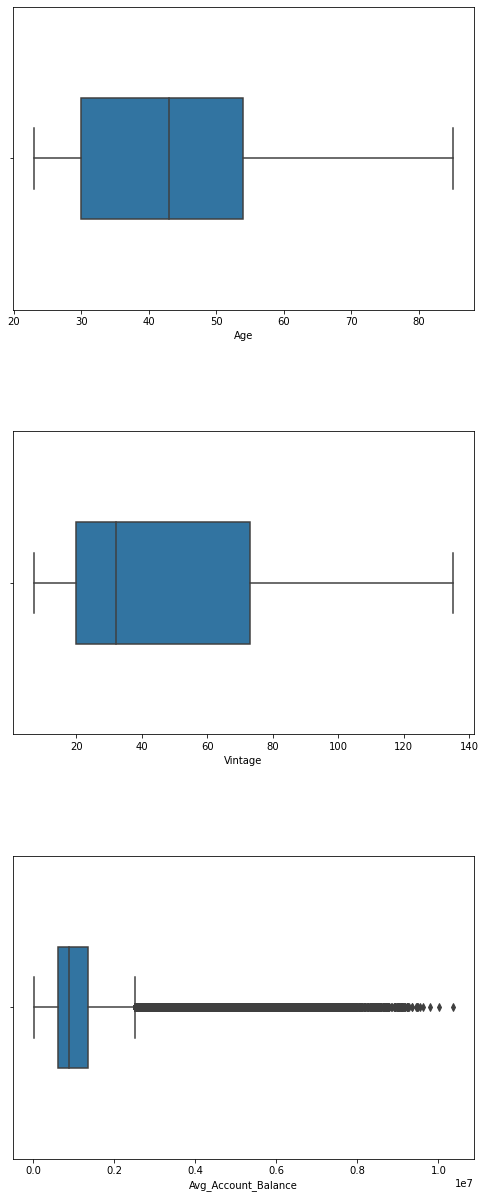

In [8]:
fig,axes = plt.subplots(3,1, figsize=(8,20)) #subplots(no of rows, no of columns)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
sns.boxplot(x='Age',data=train, ax= axes[0], width=0.4)
sns.boxplot(x='Vintage',data=train, ax= axes[1], width=0.4)
sns.boxplot(x='Avg_Account_Balance',data=train, ax= axes[2], width=0.4)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

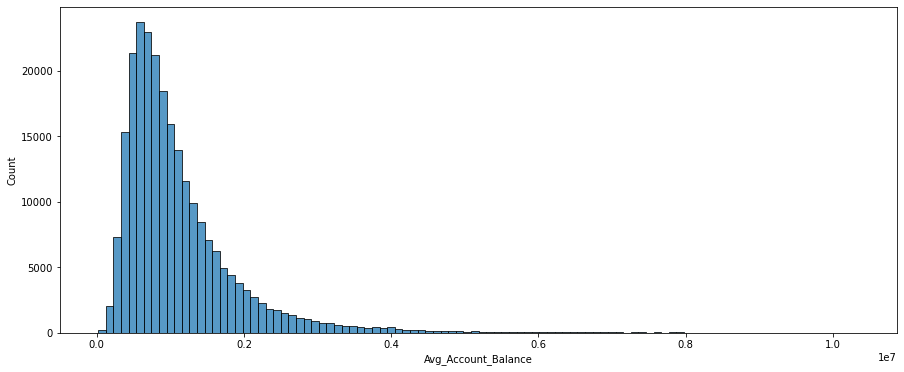

In [14]:
plt.figure(1, figsize=(15,6))
sns.histplot(train["Avg_Account_Balance"], bins= 100)

In [18]:
q1 = train["Avg_Account_Balance"].quantile(0.25)
q3 = train["Avg_Account_Balance"].quantile(0.75)
iqr = q3-q1
u_limit = q3 +1.5*iqr
l_limit  = q1 -1.5*iqr

In [25]:
len(train.loc[train["Avg_Account_Balance"]>u_limit])/len(train)

0.05946484891647166

In [37]:
acc_bnc_less_thn_upr_lmt =  train.loc[train["Avg_Account_Balance"]<u_limit]

In [49]:
acc_bnc_gr_thn_uper_lmt =  train.loc[train["Avg_Account_Balance"]>u_limit]

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

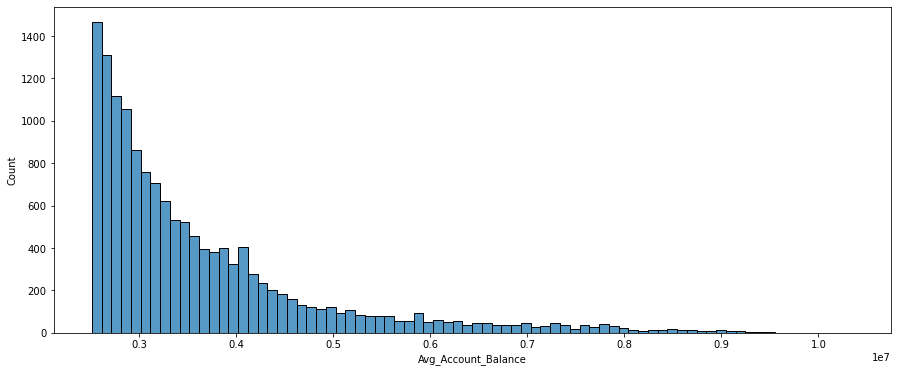

In [32]:
plt.figure(1, figsize=(15,6))
sns.histplot(acc_bnc_gr_thn_uper_lmt["Avg_Account_Balance"])

In [41]:
len(acc_bnc_gr_thn_uper_lmt[acc_bnc_gr_thn_uper_lmt["Is_Lead"]==1]) / len(acc_bnc_gr_thn_uper_lmt)

0.2714207500684369

In [44]:
len(acc_bnc_less_thn_upr_lmt[acc_bnc_less_thn_upr_lmt["Is_Lead"]==1]) / len(acc_bnc_less_thn_upr_lmt)

0.23504519434216162

##### percentage of "Is_Lead" == true in subset where account balance greater than upper limit  VS  percentage of "Is_Lead" == true in subset where account balance less than upper limit suggest we might loss information if we treat outliers. So I am leaving it as it is.

### 3. duplicates treatment

In [52]:
def duplicates(data):
    print("No of duplicate :", data.duplicated().sum())
    print("% of duplicate :", (data.duplicated().sum()/len(data))*100)

print("In train")
duplicates(train)

print("\n\nIn test ")
duplicates(test)

In train
No of duplicate : 0
% of duplicate : 0.0


In test 
No of duplicate : 0
% of duplicate : 0.0


### 5. data preparation

In [57]:
print(train["Credit_Product"].isnull().sum(), test["Credit_Product"].isnull().sum())

29325 12522


##### Credit_Product has 11 to 12 percent missisng vaues in both test and train which is significant so droping them is not an option. It has two unique Values  if we impute  yes or no somehow ...which will resut in unkown data for trained model during predictions... therfore making it as a third categaorical variable "na".... now  we have ["yes","no","na"]  as 3 unique categorica variabes for Credit_Product

##### droping ID colmn because they are unique 

##### tried one-hot encoding but no improvment for diffrent model except logistic regression rest of the models gave same roc....also computation time increased mutifold therefore going forward with label encoding.

In [59]:
def data_prep(data): #label encoding 
    data.drop(['ID'], axis=1, inplace = True )
    data["Credit_Product"] = data["Credit_Product"].fillna(0) #filling na 
    data["Credit_Product"] = data["Credit_Product"].replace({'No':1,'Yes':2})
    data["Is_Active"] = data["Is_Active"].replace({'No':0,'Yes':1})
    data["Gender"] = data["Gender"].replace({'Female':0,'Male':1})
    data["Occupation"] = data["Occupation"].replace({'Other':0,'Salaried':1,'Entrepreneur':2,'Self_Employed':3})
    data["Channel_Code"] = data["Channel_Code"].replace({'X1':0,'X2':1,'X3':2,'X4':3})
    data["Region_Code"] = data["Region_Code"].replace({'RG268': 0 ,'RG283':1 ,'RG254':2 ,'RG284':3 ,'RG277':4 ,'RG280':5 ,'RG270':5 ,'RG269':6 ,'RG261':7 ,'RG251':8 ,'RG257':8 ,'RG272':9 ,'RG282':10 ,'RG274':11 ,'RG281':12 ,'RG252':13 ,'RG273':14 ,'RG263':15 ,'RG279':16 ,'RG275':17 ,'RG260':18 ,'RG264':19 ,'RG256':20 ,'RG276':21 ,'RG259':22 ,'RG250':23 ,'RG255':24 ,'RG278':25 ,'RG258':26 ,'RG253':27 ,'RG262':29 ,'RG265':30 ,'RG271':31 ,'RG266':32 ,'RG267':33})
    

In [60]:
temp = train.copy()
data_prep(temp)
temp.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,0,0,2,43,1,1045696,0,0
1,0,30,4,1,0,32,1,581988,0,0
2,0,56,0,3,2,26,1,1484315,1,0
3,1,34,5,1,0,19,1,470454,0,0
4,0,30,10,1,0,33,1,886787,0,0


##### MinMax scaling

In [339]:
def transform(data):
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)
    return data

In [340]:
X = temp.drop('Is_Lead',axis=1) #Independent variables
X = transform(X)

In [341]:
X = pd.DataFrame(X, columns=["Gender","Age","Region_Code","Occupation","Channel_Code","Vintage","Credit_Product","Avg_Account_Balance","Is_Active"])
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.0,0.806452,0.000000,0.000000,0.666667,0.281250,0.5,0.099205,0.0
1,0.0,0.112903,0.121212,0.333333,0.000000,0.195312,0.5,0.054321,0.0
2,0.0,0.532258,0.000000,1.000000,0.666667,0.148438,0.5,0.141660,1.0
3,1.0,0.177419,0.151515,0.333333,0.000000,0.093750,0.5,0.043525,0.0
4,0.0,0.112903,0.303030,0.333333,0.000000,0.203125,0.5,0.083823,0.0
...,...,...,...,...,...,...,...,...,...
245720,1.0,0.451613,0.090909,1.000000,0.666667,0.796875,0.0,0.184373,0.0
245721,1.0,0.064516,0.000000,0.333333,0.000000,0.062500,0.5,0.081516,1.0
245722,0.0,0.048387,0.363636,0.333333,0.000000,0.046875,0.5,0.062903,0.0
245723,0.0,0.080645,0.424242,0.333333,0.000000,0.187500,0.5,0.037432,0.0


In [342]:
X.shape

(245725, 9)

In [343]:
Y = temp['Is_Lead']     #dependent variable
Y = Y.astype('float64') #data type of x and y are diffrent

In [344]:
Y.shape

(245725,)

### 6. Feature Selection
### 6.1 correlation matrix

In [114]:
temp.corr()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Gender,1.000000,0.152076,-0.021311,0.058284,0.150586,0.146380,0.001726,0.022477,0.064207,0.072068
Age,0.152076,1.000000,-0.173305,-0.019709,0.605543,0.631242,-0.005145,0.145232,0.218770,0.230814
Region_Code,-0.021311,-0.173305,1.000000,-0.056567,-0.153822,-0.183710,0.008507,-0.251650,-0.126037,-0.071240
Occupation,0.058284,-0.019709,-0.056567,1.000000,0.233852,0.120847,0.014861,-0.015787,0.117004,0.062796
Channel_Code,0.150586,0.605543,-0.153822,0.233852,1.000000,0.537852,0.020034,0.099911,0.249655,0.261211
Vintage,0.146380,0.631242,-0.183710,0.120847,0.537852,1.000000,-0.047703,0.167433,0.209356,0.279642
Credit_Product,0.001726,-0.005145,0.008507,0.014861,0.020034,-0.047703,1.000000,0.011652,-0.115421,-0.192146
Avg_Account_Balance,0.022477,0.145232,-0.251650,-0.015787,0.099911,0.167433,0.011652,1.000000,0.076637,0.053370
Is_Active,0.064207,0.218770,-0.126037,0.117004,0.249655,0.209356,-0.115421,0.076637,1.000000,0.085723
Is_Lead,0.072068,0.230814,-0.071240,0.062796,0.261211,0.279642,-0.192146,0.053370,0.085723,1.000000


<AxesSubplot:>

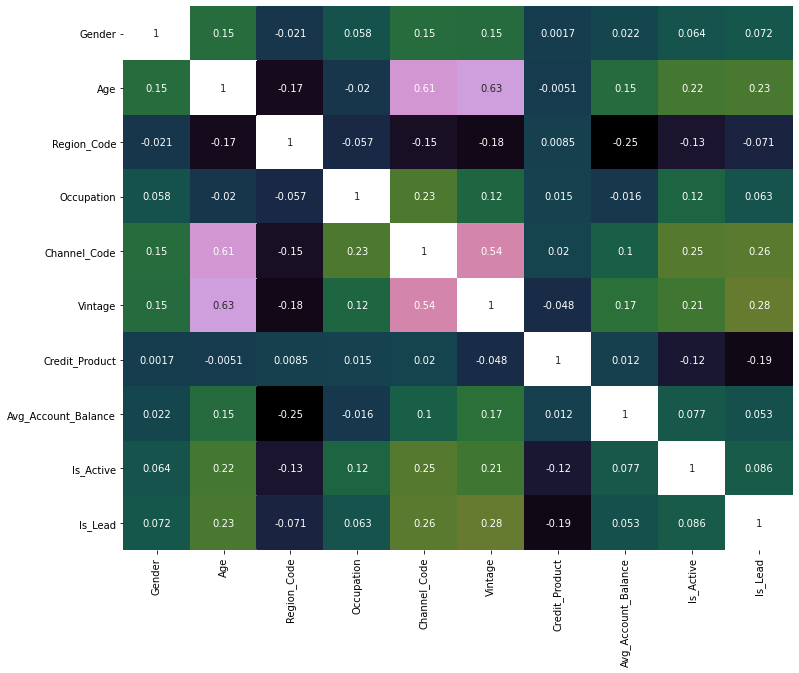

In [115]:
plt.figure(1, figsize=(12,10))
sns.heatmap(temp.corr(),cmap="cubehelix", annot=True, cbar=False)

### 6.2 Information gain

In [116]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

mutual_info = pd.Series(mutual_info_classif(X,Y))
mutual_info.index = temp.drop('Is_Lead',axis=1).columns
mutual_info.sort_values(ascending=False)

Credit_Product         0.172117
Channel_Code           0.050628
Age                    0.050192
Vintage                0.045938
Occupation             0.017572
Gender                 0.012531
Region_Code            0.008943
Is_Active              0.007457
Avg_Account_Balance    0.006408
dtype: float64

<AxesSubplot:>

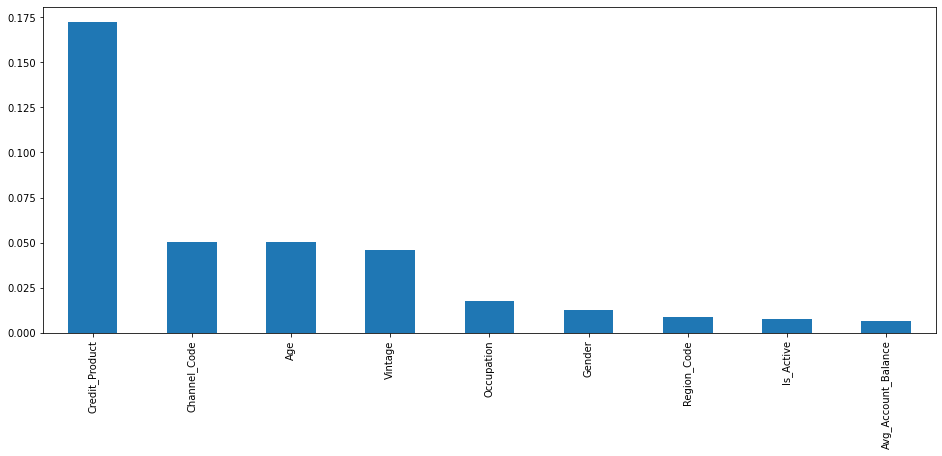

In [117]:
#plot mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16, 6))

<function matplotlib.pyplot.show(close=None, block=None)>

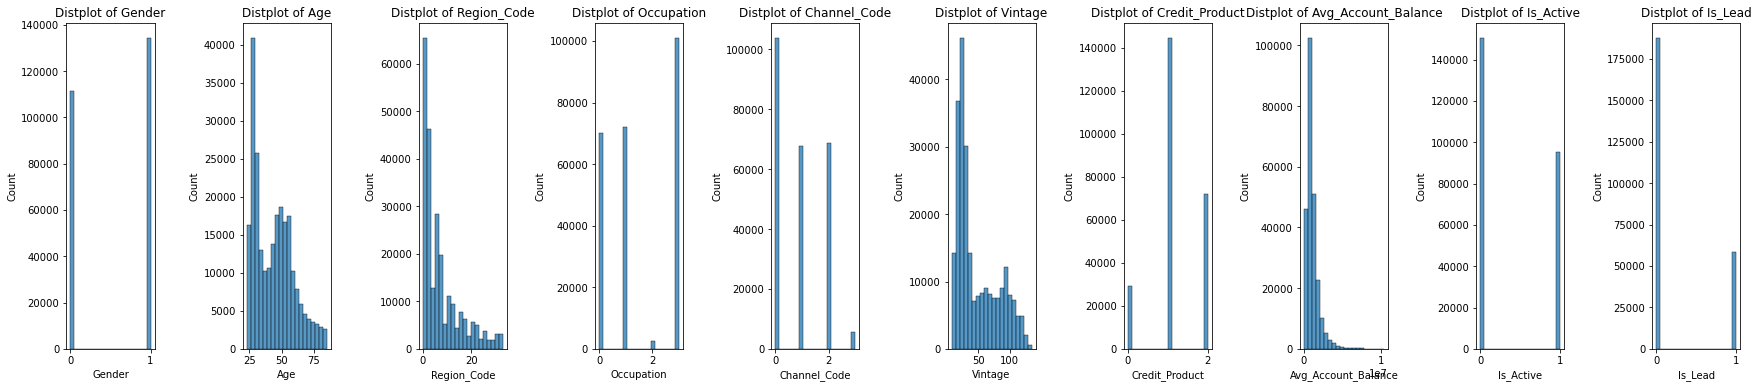

In [118]:
plt.figure(1, figsize=(30,6))
n=0
for x in temp.columns:
    n += 1
    plt.subplot(1,temp.shape[1],n)
    plt.subplots_adjust(hspace  = 1, wspace = 1)
    sns.histplot(temp[x], bins =20)
    plt.title('Distplot of {}'.format(x))
plt.show

##### distribution shows skewness... therefore stratified cross validation is the way forward

### 7. Train test Split

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                    Y, stratify=Y,
                                    test_size=0.10, random_state=0, shuffle=True)

In [284]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(221152,) (24573,)
(221152, 9) (24573, 9)


### 8. Model selection

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

#from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier

In [75]:
#scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from statistics import mean


In [76]:
seed = 1994
num_trees = 30
classifier_name = []
accuracy =  []
roc_auc = []
f1 = []
time = []

In [77]:
#Models
#SGD_classifier = SGDClassifier()
#svm_classifier = SVC()
logistic_classifier = LogisticRegression()
random_forest_classifier = RandomForestClassifier()
decision_classifier = DecisionTreeClassifier()
naiveB_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
adb_classifier = AdaBoostClassifier( n_estimators = num_trees, random_state = seed )
xgb_classifier = XGBClassifier(n_estimators = num_trees, random_state = seed )

models = [logistic_classifier, random_forest_classifier, decision_classifier, naiveB_classifier, knn_classifier, adb_classifier, xgb_classifier]

In [78]:

kfold = model_selection.StratifiedKFold( n_splits = 10, random_state = seed, shuffle=True)

for model in models:
    results = model_selection.cross_validate(model, X_train, y_train, cv = kfold, scoring=['accuracy','roc_auc','f1'])
    classifier_name.append(model.__class__.__name__)
    
    accuracy.append(mean(results['test_accuracy'])) # taking mean results of kflods
    roc_auc.append(mean(results['test_roc_auc']))
    f1.append(mean(results['test_f1']))
    time.append(mean(results['fit_time']))


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
evaluation = pd.DataFrame({'Model': classifier_name,
                           'accuracy': accuracy,
                          'roc_auc':roc_auc,
                          'f1':f1,
                         'Time': time})
evaluation

,Model,accuracy,roc_auc,f1,Time
0,LogisticRegression,0.787773,0.727041,0.348761,0.465841
1,RandomForestClassifier,0.852896,0.856815,0.649073,22.895381
2,DecisionTreeClassifier,0.782348,0.705930,0.549919,0.927670
3,GaussianNB,0.777661,0.797938,0.561071,0.067091
4,KNeighborsClassifier,0.844714,0.824277,0.637760,22.794106
5,AdaBoostClassifier,0.855376,0.865022,0.620247,3.688366
6,XGBClassifier,0.860614,0.873517,0.650703,3.307260


##### Xgb showed best reslut  therefore its selected
### 9. Xgb parameter tuning using random search

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
#from xgboost import DMatrix

params={
 "n_estimators"     : np.arange(10, 100, 5),
 "learning_rate"    : [0.001, 0.005, 0.01, 0.03, 0.05, 0.07, 0.10, 0.12, 0.15, 0.2, 0.25, 0.3, 0.5 ] ,
 "max_depth"        : np.arange(1, 20, 1),
 'use_label_encoder': [False],
 #"criterion"        : ["gini", "entropy"],
 "min_child_weight" : np.arange(1, 10, 1),
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

scoring_metric = ["accuracy", "f1_weighted", "roc_auc"]
#itr =  [5, 10, 15, 20, 25, 30]
jobs = 8
#cvs = [5,10,15,20] #automatic 5 fod startified_kfod for multilabe  not required



xgb_classifier = XGBClassifier(use_label_encoder=False)
#xgb_train = DMatrix(data = X_train, label =  y_train)

In [143]:
model = RandomizedSearchCV(
    estimator = xgb_classifier,
    param_distributions = params,
    scoring = scoring_metric,
    refit= "accuracy",
    n_iter = 10,
    n_jobs = jobs
)
model.fit(X_train, y = y_train)


print(model.best_score_)
print(model.best_estimator_.get_params())
print(model.error_score)

#print(model.scoring)
#print(model.scorer_)
#print(model.score)

[22:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8604655582237513
{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.7, 'gamma': 0.5, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.03, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 85, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
nan


### 10. Model Training

In [345]:

xgb_params= {'n_estimators': 35,
             'booster': 'gbtree',
             'random_state': 1994,
             'max_depth': 15, 
             'learning_rate': 0.015,
             'use_label_encoder': False,
             'eval_metric':'auc'}

In [346]:
def cross_val(X,Y,model,params, folds):
    
    kfold = StratifiedKFold( n_splits = folds, random_state = seed, shuffle=True)
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X,Y)):
        print("fold :", fold)
        
        x_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]
        
        alg = model(**params)
        alg.fit(x_train, y_train, eval_set = [(x_test, y_test)],early_stopping_rounds=100,verbose=400)
        
        pred = alg.predict(x_test)
        roc_score = roc_auc_score(y_test, pred)
        accuracy = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred, average = "weighted") 
        print(f"   accuracy: {accuracy}")
        print(f"   f1_score: {f1}")
        print(f"   roc_auc_score: {roc_score}")
        print("-"*100)
    
    return alg
    
    

In [347]:
xgb_model = cross_val(X_train, y_train, XGBClassifier,xgb_params, folds = 10)

fold : 0
[0]	validation_0-auc:0.86529
[34]	validation_0-auc:0.87017
   accuracy: 0.8535901609694339
   f1_score: 0.8467464417368855
   roc_auc_score: 0.7587636929347586
----------------------------------------------------------------------------------------------------
fold : 1
[0]	validation_0-auc:0.86753
[34]	validation_0-auc:0.86973
   accuracy: 0.8537258093687827
   f1_score: 0.8464117811551605
   roc_auc_score: 0.7566854222179836
----------------------------------------------------------------------------------------------------
fold : 2
[0]	validation_0-auc:0.86542
[34]	validation_0-auc:0.86761
   accuracy: 0.8510513226316979
   f1_score: 0.8439051021342693
   roc_auc_score: 0.7543704366311552
----------------------------------------------------------------------------------------------------
fold : 3
[0]	validation_0-auc:0.86449
[34]	validation_0-auc:0.86729
   accuracy: 0.8540809405380964
   f1_score: 0.8458621978636154
   roc_auc_score: 0.75291490094093
-----------------------

### 11. Validating predictions on test set

In [348]:
pred_test_set = xgb_model.predict(X_test)  #new

accuracy = accuracy_score(y_test, pred_test_set)
f1 = f1_score(y_test, pred_test_set, average = "weighted")
roc_score = roc_auc_score(y_test, pred_test_set)

print(f"roc_auc_score: {roc_score}")
print(f"accuracy: {accuracy}")
print(f"f1_score: {f1}")

roc_auc_score: 0.7592008993401135
accuracy: 0.8555324950148537
f1_score: 0.848311833439668


Text(0.5, 1.0, 'Prediction')

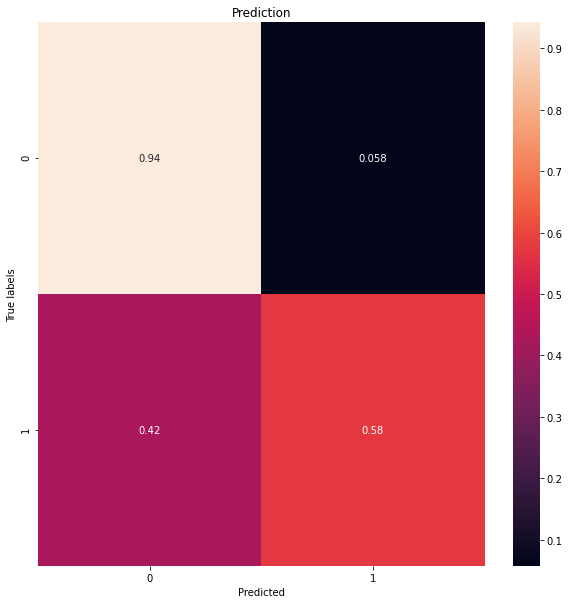

In [349]:
from sklearn.metrics import confusion_matrix
plt.figure(1, figsize=(10,10))
ax = plt.subplot()
cm = confusion_matrix(y_test, pred_test_set, normalize = "true")
sns.heatmap(cm, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True labels")
ax.set_title("Prediction")

# submission data prep and prediction

In [350]:
test_set = test.copy()
data_prep(test_set)
test_set = transform(test_set)
test_set

array([[1.        , 0.08196721, 0.06060606, ..., 1.        , 0.07280498,
        0.        ],
       [1.        , 0.31147541, 0.        , ..., 0.        , 0.09133281,
        0.        ],
       [1.        , 0.1147541 , 0.15151515, ..., 0.5       , 0.01955765,
        0.        ],
       ...,
       [1.        , 0.18032787, 0.06060606, ..., 0.5       , 0.1700471 ,
        0.        ],
       [1.        , 0.47540984, 0.06060606, ..., 0.5       , 0.07228021,
        1.        ],
       [1.        , 0.04918033, 0.60606061, ..., 0.5       , 0.05755138,
        0.        ]])

In [351]:
pred_test_xgb = xgb_model.predict_proba(test_set)

In [352]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0.500422
1,CCMEWNKY,0.516705
2,VK3KGA9M,0.594557
3,TT8RPZVC,0.500422
4,SHQZEYTZ,0.462837


In [353]:
submission['Is_Lead'] = pred_test_xgb

In [354]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0.688027
1,CCMEWNKY,0.330475
2,VK3KGA9M,0.683722
3,TT8RPZVC,0.696364
4,SHQZEYTZ,0.696364


In [95]:
submission.to_csv(f'pred_test_xgb.csv',index=False)

In [355]:
print("finish")

finish
